In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
import cv2
from PIL import Image
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras import backend as K
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
base_dir = '/content/drive/My Drive/Image Classification/datasets'
train_dir='/content/drive/My Drive/Image Classification/datasets/train'
train_cover_dir='/content/drive/My Drive/Image Classification/datasets/train/Cover Drive'
train_cut_dir='/content/drive/My Drive/Image Classification/datasets/train/Cut Shot'
train_flick_dir='/content/drive/My Drive/Image Classification/datasets/train/Flick'
train_square_dir='/content/drive/My Drive/Image Classification/datasets/train/Square cut'
test_dir='/content/drive/My Drive/Image Classification/datasets/test'
test_cover_dir='/content/drive/My Drive/Image Classification/datasets/test/Cover drive'
test_cut_dir='/content/drive/My Drive/Image Classification/datasets/test/Cut shot'
test_flick_dir='/content/drive/My Drive/Image Classification/datasets/test/Flick'
test_square_dir='/content/drive/My Drive/Image Classification/datasets/test/Square cut'
valid_dir='/content/drive/My Drive/Image Classification/datasets/validation'
valid_cover_dir='/content/drive/My Drive/Image Classification/datasets/validation/Cover'
valid_cut_dir='/content/drive/My Drive/Image Classification/datasets/validation/cut'
valid_flick_dir='/content/drive/My Drive/Image Classification/datasets/validation/flick'
valid_square_dir='/content/drive/My Drive/Image Classification/datasets/validation/square'

In [10]:
num_cover_train = len(os.listdir(train_cover_dir))
num_cut_train = len(os.listdir(train_cut_dir))
num_flick_train = len(os.listdir(train_flick_dir))
num_square_train = len(os.listdir(train_square_dir))
total_train=num_cover_train+num_cut_train+num_flick_train+num_square_train
print(total_train)
num_cover_valid=len(os.listdir(valid_cover_dir))
num_cut_valid=len(os.listdir(valid_cut_dir))
num_square_valid=len(os.listdir(valid_square_dir))
num_flick_valid=len(os.listdir(valid_flick_dir))
total_valid=num_cover_valid+num_cut_valid+num_flick_valid+num_square_valid

2317


In [11]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_dir,target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_dir, target_size=(224,224))

Found 2316 images belonging to 4 classes.
Found 9 images belonging to 4 classes.


In [12]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [13]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [15]:

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

[[0.43470594 0.48686817 0.02743042 0.0509954 ]]


'CUT'

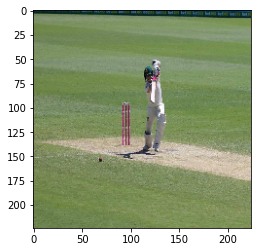

In [20]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

#add the image location below
img = image.load_img("/content/drive/My Drive/Image Classification/datasets/test/Cover drive/test_001.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("shots.h5")#preprocessed model of shots with 10epoch
output = saved_model.predict(img)
print(output)
class_names = ['COVER','CUT','FLICK','SQUARE']

class_names[np.argmax(output)]
